# 스타벅스

- 트레인 테스트 분리 안 시키고 통째로 돌렸습니다 
- csv 위치는 바꿔주세요

In [105]:
import pandas as pd

starbucks_df = pd.read_csv('/Users/minholee/playdata/deeplearning/starbucks_review/train.csv', header=0, quoting = 2)

In [106]:
def remove_special_letter(series) :
    import re
    for i in range(len(series)) :
        series[i] = re.split('[\n]', series[i])
    
    for i in range(len(series)) :
        num = ''
        for j in range(len(series[i]))  :
             num += series[i][j]
        series[i] = num
    return series

In [107]:
def replace_special_letter(series) :
    for i in range(len(series)) :
        series[i] = series[i].replace('^^', ' 좋음')
        series[i] = series[i].replace('♥', ' 좋음')
        series[i] = series[i].replace('♡', ' 좋음')
        series[i] = series[i].replace('★', ' 좋음')
        series[i] = series[i].replace(';', ' 아쉬움')

        
    for i in range(len(series)) :
        num = ''
        for j in range(len(series[i]))  :
             num += series[i][j]
        series[i] = num
    return series

In [108]:
starbucks_df.head(3)

,label,document
0,0.0,주말에 사람이 적은 편. 2층 와이파이가 안돼서 1층 와이파이에 연결했는데 불안정함.
1,1.0,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,1.0,방금 확인했어요~


In [109]:
starbucks_df = starbucks_df.astype({'label': 'int32'})

In [110]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     3797 non-null   int32 
 1   document  3797 non-null   object
dtypes: int32(1), object(1)
memory usage: 44.6+ KB


In [111]:
import re



In [112]:
# 학습 데이터 전처리
starbucks_df['document'] = starbucks_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
starbucks_df['document'] = remove_special_letter(starbucks_df['document'])
starbucks_df['document'] = replace_special_letter(starbucks_df['document'])



/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/1177029861.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  starbucks_df['document'] = starbucks_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/3632432536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = re.split('[\n]', series[i])
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/3632432536.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = num
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ip

In [113]:
starbucks_df.head()

,label,document
0,0,주말에 사람이 적은 편 층 와이파이가 안돼서 층 와이파이에 연결했는데 불안정함
1,1,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,1,방금 확인했어요
3,0,별적립 개 무료음료쿠폰으로는 프리퀀시적립이 안된다기에 작년에는 됐던것같아서 아 적립...
4,1,요 근처에서 보기드물게 넓고 쾌적한 스벅이네요


In [114]:
starbucks_class_df = starbucks_df['label']
starbucks_feature_df = starbucks_df.drop(['label'], axis= 1, inplace=False)

In [115]:
starbucks_feature_df

,document
0,주말에 사람이 적은 편 층 와이파이가 안돼서 층 와이파이에 연결했는데 불안정함
1,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,방금 확인했어요
3,별적립 개 무료음료쿠폰으로는 프리퀀시적립이 안된다기에 작년에는 됐던것같아서 아 적립...
4,요 근처에서 보기드물게 넓고 쾌적한 스벅이네요
...,...
3792,직원분들 친절했어요
3793,너무 맘에드네요 주차도 가능하구요
3794,계산하는 나이 있어보이는 여자 자기 잘못을 고객에게 전가하려 하고 싸가지 없음 다른...
3795,확트인공간 맛난커피 그런데 주차가 ㅠㅠ딱지끊은적잇음료 길가주차하지마세요


In [116]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score



In [117]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [118]:
from konlpy.tag import Komoran, Okt
from tqdm import tqdm


In [119]:
starbucks_class_df

0       0
1       1
2       1
3       0
4       1
       ..
3792    1
3793    1
3794    0
3795    1
3796    1
Name: label, Length: 3797, dtype: int32

In [120]:
starbucks_feature_df 

,document
0,주말에 사람이 적은 편 층 와이파이가 안돼서 층 와이파이에 연결했는데 불안정함
1,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,방금 확인했어요
3,별적립 개 무료음료쿠폰으로는 프리퀀시적립이 안된다기에 작년에는 됐던것같아서 아 적립...
4,요 근처에서 보기드물게 넓고 쾌적한 스벅이네요
...,...
3792,직원분들 친절했어요
3793,너무 맘에드네요 주차도 가능하구요
3794,계산하는 나이 있어보이는 여자 자기 잘못을 고객에게 전가하려 하고 싸가지 없음 다른...
3795,확트인공간 맛난커피 그런데 주차가 ㅠㅠ딱지끊은적잇음료 길가주차하지마세요


In [121]:
komoran = Komoran()
okt = Okt()

In [122]:
X_test = pd.read_csv('/Users/minholee/playdata/deeplearning/starbucks_review/test.csv',encoding='cp949', header=0, quoting = 2)

In [123]:
X_test

,no,document
0,1.0,화장실이 좀 별로지만 직원분들 다 친절하시고 매장 깔끔함
1,2.0,최고예요
2,3.0,서비스 굿
3,4.0,"친절하고, 자리 넓고 좋아요"
4,5.0,최고예요
...,...,...
1261,1262.0,드라이브쓰루 좋아요
1262,1263.0,사이렌오더 확인안함.. 직원 5명 아무것도 안하고 수다떨고.. 매장와서 사이렌오더...
1263,1264.0,스타벅스는 직원교육으로 유명한데.. 여기 스탭님들은 왜....
1264,1265.0,조금 아쉬워요


In [124]:
tokenized_X_train = []

for sentence in tqdm(starbucks_feature_df['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 3797/3797 [00:03<00:00, 1220.35it/s]


In [125]:
tokenized_X_test = []

for sentence in tqdm(X_test['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_test.append(stopwords_removed_sentence)

100%|██████████| 1266/1266 [00:01<00:00, 1157.03it/s]


In [126]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [127]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [128]:
print(tokenizer.word_index)

{'좋다': 1, '예요': 2, '친절하다': 3, '최고': 4, '직원': 5, '있다': 6, '없다': 7, '매장': 8, '너무': 9, '사람': 10, '많다': 11, '분': 12, '분들': 13, '스타벅스': 14, '커피': 15, '안': 16, '자리': 17, '보다': 18, '맛': 19, '넓다': 20, '스벅': 21, '을': 22, '가다': 23, '곳': 24, '다': 25, '주문': 26, '층': 27, '음료': 28, '않다': 29, '되다': 30, '로': 31, '별로': 32, '에서': 33, '같다': 34, '때': 35, '이다': 36, '다른': 37, '요': 38, '불친절하다': 39, '여기': 40, '오다': 41, '화장실': 42, '아니다': 43, '맛있다': 44, '만': 45, '아쉽다': 46, '고': 47, '조금': 48, '받다': 49, '하고': 50, '항상': 51, '해주다': 52, '중': 53, '기분': 54, '것': 55, '파트너': 56, '먹다': 57, '분위기': 58, '들다': 59, '친절': 60, '나오다': 61, '그렇다': 62, '적': 63, '못': 64, '손님': 65, '일': 66, '말': 67, '자다': 68, '자주': 69, '나': 70, '서비스': 71, '남자': 72, '정말': 73, '진짜': 74, '많이': 75, '점': 76, '안되다': 77, '주차': 78, '시간': 79, '지점': 80, '불친절': 81, '그': 82, '시끄럽다': 83, '주다': 84, '더': 85, '엄청': 86, 'ㅠㅠ': 87, '리저': 88, '공부': 89, '여자': 90, '그냥': 91, '조용하다': 92, '시': 93, '앉다': 94, '인데': 95, '인': 96, '제': 97, '까지': 98, '이라': 99, '괜찮다': 100, '말다': 10

In [129]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4549
등장 빈도가 2번 이하인 희귀 단어의 수: 2884
단어 집합에서 희귀 단어의 비율: 63.39854913167729
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.675563106264043


In [130]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1666


In [131]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)
X_test = tokenizer.texts_to_sequences(tokenized_X_test)

In [132]:
import numpy as np

y_train = np.array(starbucks_class_df)

In [133]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [134]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

3742
3742


/Users/minholee/miniconda/envs/tf-learning/lib/python3.8/site-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [135]:
len(y_train)

3742

In [136]:
print(X_train[:3])


[list([177, 10, 211, 271, 27, 161, 16, 246, 27, 161])
 list([56, 13, 74, 444, 3, 9, 1, 247]) list([248])]


리뷰의 최대 길이 : 136
리뷰의 평균 길이 : 8.808925708177446


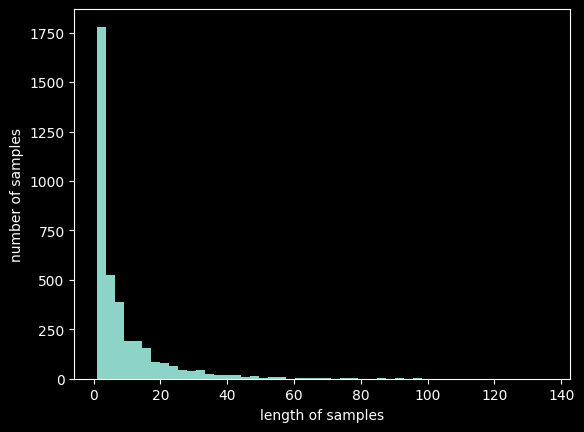

In [137]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [138]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [139]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.26296098343133


In [140]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [141]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15


2023-03-02 10:52:57.856689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-02 10:52:58.113027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-02 10:52:58.448617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5248 - acc: 0.7441

2023-03-02 10:53:02.735774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-02 10:53:02.821655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.83044, saving model to best_model.h5
47/47 [==============================] - 6s 99ms/step - loss: 0.5248 - acc: 0.7441 - val_loss: 0.3858 - val_acc: 0.8304
Epoch 2/15
47/47 [==============================] - ETA: 0s - loss: 0.2967 - acc: 0.8770
Epoch 2: val_acc improved from 0.83044 to 0.92523, saving model to best_model.h5
47/47 [==============================] - 2s 52ms/step - loss: 0.2967 - acc: 0.8770 - val_loss: 0.2174 - val_acc: 0.9252
Epoch 3/15
47/47 [==============================] - ETA: 0s - loss: 0.1874 - acc: 0.9318
Epoch 3: val_acc did not improve from 0.92523
47/47 [==============================] - 2s 47ms/step - loss: 0.1874 - acc: 0.9318 - val_loss: 0.2745 - val_acc: 0.9146
Epoch 4/15
46/47 [============================>.] - ETA: 0s - loss: 0.1494 - acc: 0.9450
Epoch 4: val_acc improved from 0.92523 to 0.92657, saving model to best_model.h5
47/47 [==============================] - 2s 45ms/step - loss: 0.1504 - acc: 0.9445 - v

In [142]:
kaggle_test = pd.read_csv('/Users/minholee/playdata/deeplearning/starbucks_review/test.csv', encoding= 'cp949')

In [143]:
kaggle_test

,no,document
0,1,화장실이 좀 별로지만 직원분들 다 친절하시고 매장 깔끔함
1,2,최고예요
2,3,서비스 굿
3,4,"친절하고, 자리 넓고 좋아요"
4,5,최고예요
...,...,...
1261,1262,드라이브쓰루 좋아요
1262,1263,사이렌오더 확인안함.. 직원 5명 아무것도 안하고 수다떨고.. 매장와서 사이렌오더...
1263,1264,스타벅스는 직원교육으로 유명한데.. 여기 스탭님들은 왜....
1264,1265,조금 아쉬워요


In [144]:
# 학습 데이터 전처리
kaggle_test['document'] = kaggle_test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
kaggle_test['document'] = remove_special_letter(kaggle_test['document'])
kaggle_test['document'] = replace_special_letter(kaggle_test['document'])



/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/437476828.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  kaggle_test['document'] = kaggle_test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/3632432536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = re.split('[\n]', series[i])
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipykernel_25352/3632432536.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = num
/var/folders/s0/5rhprztj2xs1kzwd87bwg_y00000gn/T/ipyke

In [145]:
kaggle_test_list = []
for sentence in tqdm(kaggle_test['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    kaggle_test_list.append(stopwords_removed_sentence)

100%|██████████| 1266/1266 [00:02<00:00, 471.16it/s]


In [146]:
X_test = tokenizer.texts_to_sequences(kaggle_test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [147]:
loaded_model = load_model('best_model.h5')

In [148]:
y_pred = loaded_model.predict(X_test)

2023-03-02 10:53:22.456590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-02 10:53:22.531152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 12ms/step


In [149]:
from sklearn.metrics import confusion_matrix

y_pred_zero = np.around(y_pred)

In [150]:
len(y_pred_zero)

1266

In [151]:
kaggle_submission = pd.read_csv('/Users/minholee/playdata/deeplearning/starbucks_review/submission.csv', encoding= 'cp949')

In [152]:
kaggle_submission['class'] = y_pred_zero

In [153]:
kaggle_submission = kaggle_submission.astype({'class': 'int32'})

In [154]:
kaggle_submission

,no,class
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1261,1262,1
1262,1263,1
1263,1264,0
1264,1265,0


In [155]:
kaggle_submission.to_csv("/Users/minholee/playdata/deeplearning/starbucks_review/skyggle_submission_byint.csv", index=False)